<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/nisar/Sea_Ice_NISAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# SAR Application: Sea Ice
### I. How to create SAR quicklook images of Sea Ice?

* Useful Products: VV and HH in dB
* Useful Wavelengths: L, S, C, X, Ku


### II. How to interpret SAR images of Sea Ice?

Young sea ice has a lower backscatter signature relative to older/thicker sea ice.


## Beaufort Sea

The content of this notebook is as follows:
1. [Running the Notebook](#s1)
2. [Sea Ice Background](#s2)
3. [UAVSAR Collection Beaufort Sea](#s3)
4. [VV Geotiffs](#s4)

<a name="s1"></a>
## 1. Running the Notebook
- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**.

### Install Python Packages:
This routine using the following python libaries. Some are already included in the Google Colab environment and others are installed in the cell below before imported. Downloading new python packages to this environment may take a few minutes to complete.

In [1]:
!pip install rasterio --quiet

import rasterio as rio
import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from IPython.display import Image
import getpass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 41.8 MB/s eta 0:00:00


##### Install GDAL dependencies to Google Colab

In [ ]:
!%%shell
!yes | add-apt-repository ppa:ubuntugis/ppa
!apt-get update
!apt-get install gdal-bin libgdal-dev
!C_INCLUDE_PATH=/usr/include/gdal CPLUS_INCLUDE_PATH=/usr/include/gdal python -m pip install GDAL=="$(gdal-config --version)"

### Download the Data:
Fetch UAVSAR geotiffs from the download links below with wget.

A free Earthdata account is required to download the data! If needed, link to create Earthdata account: https://urs.earthdata.nasa.gov/users/new

In [ ]:
# Enter NASA's Earth data login
username = getpass.getpass(prompt='Earthdata username:')
password = getpass.getpass(prompt='Earthdata password:')

The UAVSAR files come in *.grd format. We need to generate ENVI HDR files to make them GIS-compatible and readable into this notebook. To do this, we will can clone and use the script below.

In [ ]:
# Clone the script to generate UAVSAR HDR files
# View script options with: !python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -h
!git clone https://bitbucket.org/nathanmthomas/bucket-of-rs-and-gis-scripts/src/master/BuildUAVSARhdr.py

We will use these functions and variables below throughout the notebook.

In [5]:
#@title Define variables

# Define input directory and output directory
input_directory = './'  # Directory containing GRD and INC files
output_directory = './'  # Directory to save processed files

# Run the HDR script for all the GRD annd annotation files in the directory
int_polarization = 'INT'
unw_polarization = 'UNW'

## Define functions

# function to download files from Earthdata with wget
def download_files(files, username, password):
    for file in files:
        print(f'downloading {file}...')
        os.system(f"wget --user {username} --password {password} {file} --quiet")

## Function to process .int.grd Files
def process_int_files(input_dir, output_dir, filename_string, window, projection):
  """
  Function to take all the GRD files in the input directory and save as geotiffs.
  Can set new extents and projections for the output geotiff.
  """
  grd_files = [file for file in os.listdir(input_dir) if file.endswith('.int.grd') and file.startswith(filename_string)]
  for grd_file in grd_files:
    input_path = os.path.join(input_dir, grd_file)
    print(input_path)
    output_path = os.path.join(output_dir, grd_file.replace('.int.grd', '_int_clipped.tif'))
    print(output_path)
    gdal.Warp(output_path, input_path, format='GTiff', outputBounds=window, dstSRS=projection)

## Function to process .unw.grd Files
def process_unw_files(input_dir, output_dir, filename_string, window, projection):
  """
  Function to take all the GRD files in the input directory and save as geotiffs.
  Can set new extents and projections for the output geotiff.
  """
  grd_files = [file for file in os.listdir(input_dir) if file.endswith('.unw.grd') and file.startswith(filename_string)]
  for grd_file in grd_files:
    input_path = os.path.join(input_dir, grd_file)
    print(input_path)
    output_path = os.path.join(output_dir, grd_file.replace('.unw.grd', '_unw_clipped.tif'))
    print(output_path)
    gdal.Warp(output_path, input_path, format='GTiff', outputBounds=window, dstSRS=projection)

<a name="s2"></a>
## 2. Beaufort Sea Ice

From Dierking 2013, Sea ice occurs in different stages of development:
* Drifting pack ice - major fraction of sea ice that responds to forces from the wind and ocean currents
* In the initial phase of ice growth, ice crystals appear in the uppermost water layer (frazil and grease ice).
* Under calm ocean conditions, smooth, elastic ice crusts up to 10 cm thick (called nilas) develop, followed by the stage of young ice (10–30 cm thick).
* If the ocean surface is roughened by wind, ice crystals accumulate to create pancake ice rounded ice floes, often with rimmed edges caused by numerous collisions between single floes.
* Eventually, young ice or pancakes increase in thickness, and pancakes freeze together to form a closed ice cover. When the ice is 30–200 cm thick, it is called first-year ice. Multiyear ice is typically more than 2 m thick.

The pictures below were taken from the Office of Naval Research (ONR) Sea State Field Campaign September-November 2015. The upper right corner is nilas sea ice, the lower left corner is pancake ice, the lower right corner is multiyear ice (MYI). (Image Credit: Ben Holt, JPL)

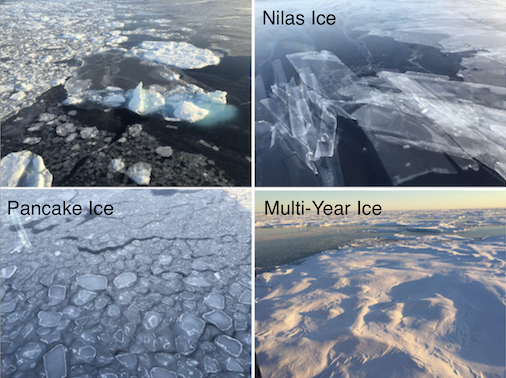

<a name="s3"></a>
## 3. UAVSAR Collection Beaufort Sea

Image Credit: Ben Holt

The figure above labels different sea ice types from the October 06, 2015 UAVSAR line collected over the Beaufort Sea.

* Thin FYI = First-Year Ice
* Nilas
* MY floe = Multi-Year Ice Floe
* Young pancakes
* Cemented pancakes

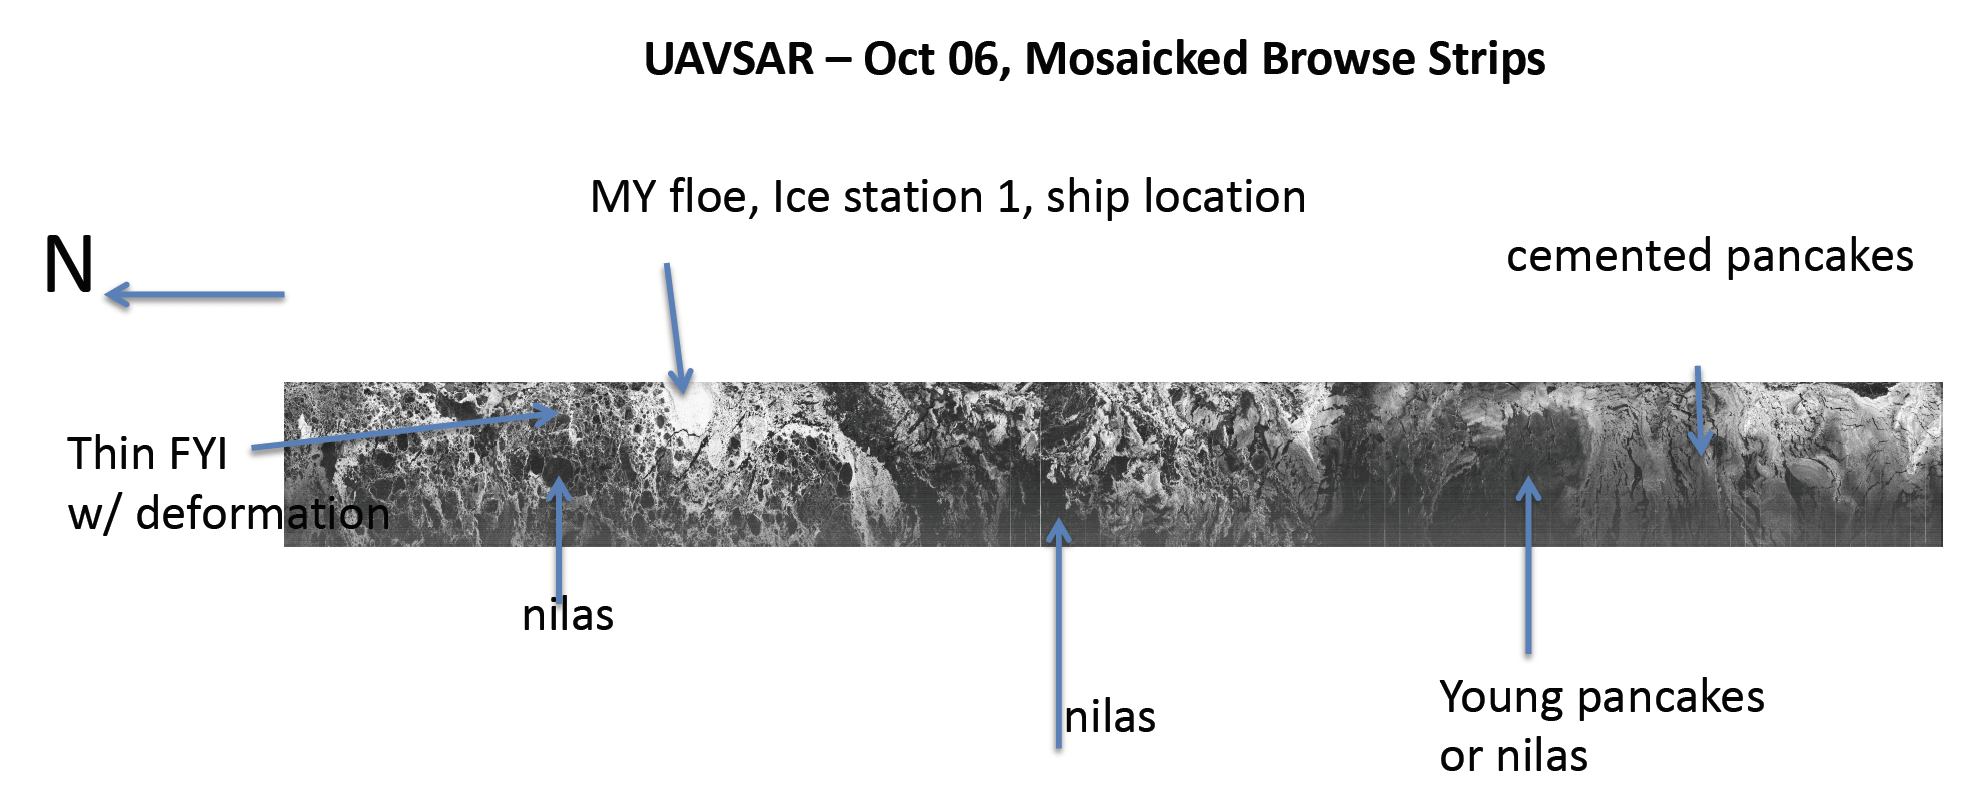


<a name="s4"></a>
## 4. VV Geotiffs

The UAVSAR line (beaufo_01104_15148_000_151006_L090_CX_01) captures multiple ice types and regions of nilas, young pancake, cemented pancake, and floe regions are plotted below.
* UAVSAR line data page: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=beaufo_01104_15148_000_151006_L090_CX_03#data
* NISAR Simulated data page: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=beaufo_01104_15148_000_151006_L090_XX_05#data


First, fetch UAVSAR geotiffs with wget.

In [ ]:
# UAVSAR Data Download
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_CX_03_cemented_pancakes.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_CX_03_floe.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_CX_03_nilas.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_CX_03_young_pancakes.tif --quiet

# NISAR Simulated Data Download
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_NISAR_cemented_pancakes.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_NISAR_nilas.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_NISAR_young_pancakes.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_151006_L090VVVV_NISAR_floe.tif --quiet

In [3]:
# Beaufort Sea Ice, UAVSAR data files
uavsar_files = ["https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.ann",
         "https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.int.grd",
         "https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.unw.grd"]

# Call the function with your username and password to download the files
download_files(uavsar_files, username, password)

# Beaufort Sea Ice, NISAR Simulated data files
nisar_files = [

]
download_files(nisar_files, username, password)

NameError: name 'download_files' is not defined

In [ ]:
## Generate HDR fires for Sea Ice Line
annotation_file = 'SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.ann'
int_file = 'SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.int.grd'
unw_file = 'SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.unw.grd'

!python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -i {annotation_file} -r {int_file} -p {int_polarization}
!python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -i {annotation_file} -r {unw_file} -p {unw_polarization}

## Generate HDR fires for NISAR Simulated Sea Ice Line

Read in UAVSAR VV geotiffs and convert to decibels (dB).


In [ ]:
def read_file(path):
    with rio.open(path) as ds:
        band = ds.read(1)
    return band

def convert_db_v1(data):
    db = 10*(math.log10(data))
    return db

convert_db = np.vectorize(convert_db_v1)

## Sea Ice line split into segments
young_pancakes = read_file('beaufo_01104_15148_000_151006_L090VVVV_CX_03_young_pancakes.tif')
cemented_pancakes = read_file('beaufo_01104_15148_000_151006_L090VVVV_CX_03_cemented_pancakes.tif')
nilas = read_file('beaufo_01104_15148_000_151006_L090VVVV_CX_03_nilas.tif')
floe = read_file('beaufo_01104_15148_000_151006_L090VVVV_CX_03_floe.tif')

## Convert to decibels
young_pancakes = convert_db(young_pancakes)
cemented_pancakes = convert_db(cemented_pancakes)
nilas = convert_db(nilas)
floe = convert_db(floe)

Plot UAVSAR subsets over different sea ice types. Thicker, older ice have higher dB values and appear brighter in the plots below.

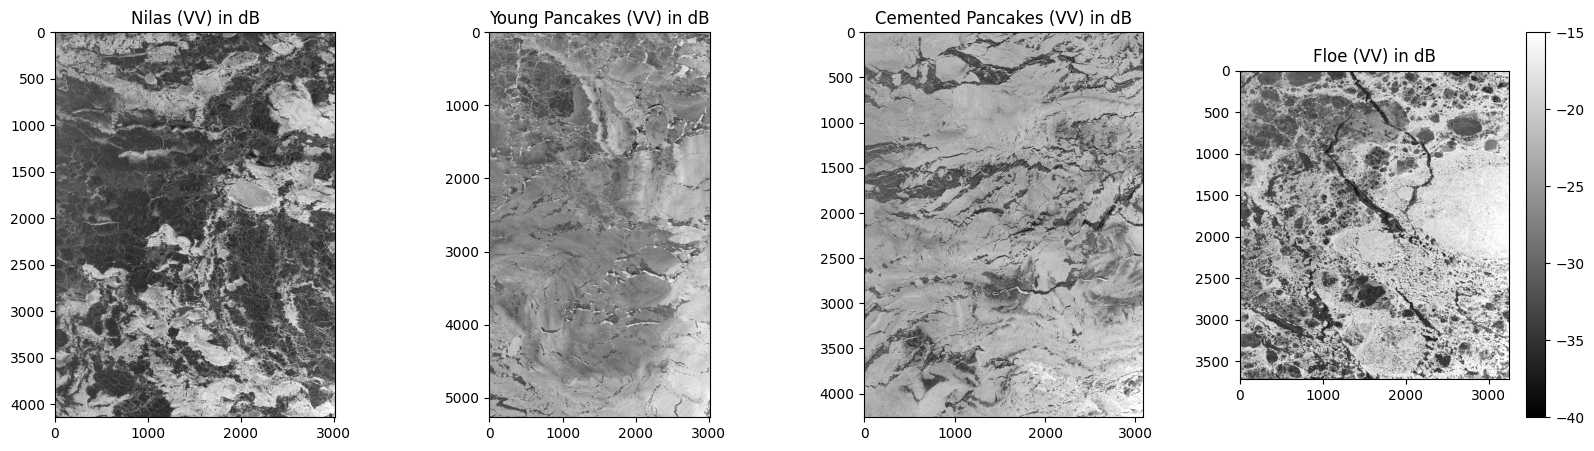

In [ ]:
## Plot UAVSAR Sea Ice line
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

vmin = -40
vmax  = -15

nilas_plot = ax[0].imshow(nilas, vmin=vmin, vmax=vmax, cmap='gray')
ax[0].set_title('Nilas (VV) in dB')
# fig.colorbar(nilas_plot, ax=ax[0])

young_pancakes_plot = ax[1].imshow(young_pancakes, vmin=vmin, vmax=vmax, cmap='gray')
ax[1].set_title('Young Pancakes (VV) in dB')
# fig.colorbar(young_pancakes_plot, ax=ax[1])

cemented_pancakes_plot = ax[2].imshow(cemented_pancakes , vmin=vmin, vmax=vmax, cmap='gray')
ax[2].set_title('Cemented Pancakes (VV) in dB')
# fig.colorbar(cemented_pancakes_plot, ax=ax[2])

floe_plot = ax[3].imshow(floe , vmin=vmin, vmax=vmax, cmap='gray')
ax[3].set_title('Floe (VV) in dB')
fig.colorbar(floe_plot, ax=ax[3])

Plot histograms of VV geotiffs

Text(0.5, 0, 'decibel (dB)')

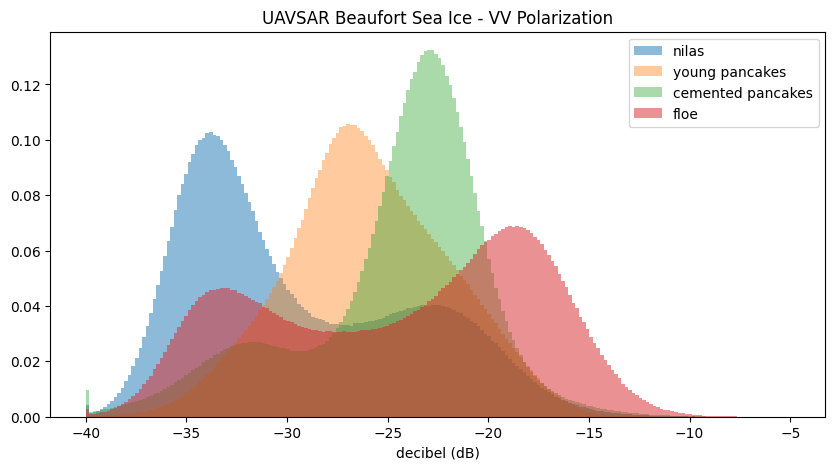

In [ ]:
n = 200
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(np.clip(nilas.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='nilas')
ax.hist(np.clip(young_pancakes.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='young pancakes')
ax.hist(np.clip(cemented_pancakes.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='cemented pancakes')
ax.hist(np.clip(floe.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='floe')
ax.set_title('UAVSAR Beaufort Sea Ice - VV Polarization')
ax.legend(prop={'size': 10})
ax.set_xlabel('decibel (dB)')

## NISAR Simulated

Mode 129A

Text(0.5, 0, 'decibel (dB)')

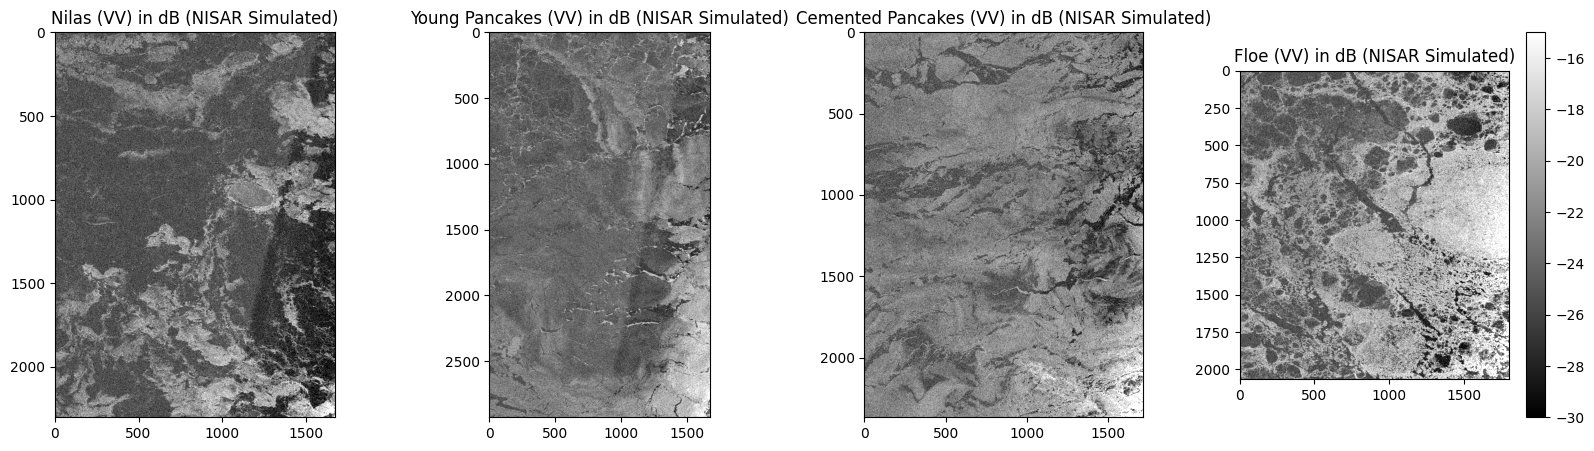

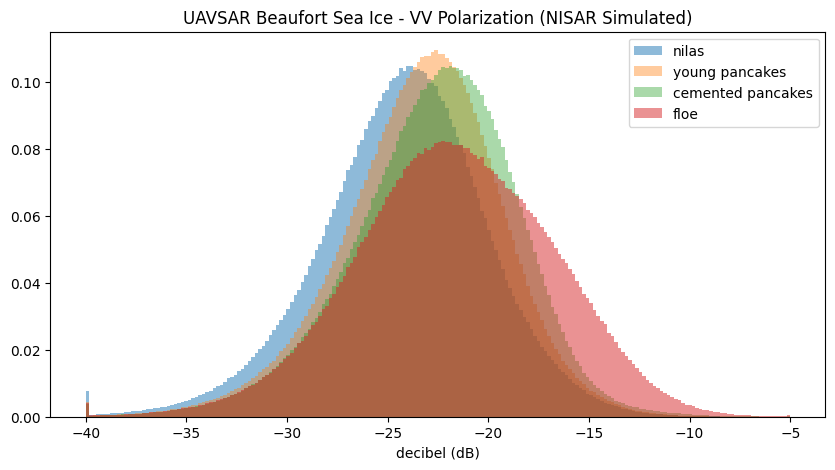

In [ ]:
## Read in NISAR Simulated Data
young_pancakes_nisar = read_file('beaufo_01104_15148_000_151006_L090VVVV_NISAR_young_pancakes.tif')
cemented_pancakes_nisar = read_file('beaufo_01104_15148_000_151006_L090VVVV_NISAR_cemented_pancakes.tif')
nilas_nisar = read_file('beaufo_01104_15148_000_151006_L090VVVV_NISAR_nilas.tif')
floe_nisar = read_file('beaufo_01104_15148_151006_L090VVVV_NISAR_floe.tif')

## Convert to decibels
young_pancakes_nisar = convert_db(young_pancakes_nisar)
cemented_pancakes_nisar = convert_db(cemented_pancakes_nisar)
nilas_nisar = convert_db(nilas_nisar)
floe_nisar = convert_db(floe_nisar)

## Plot UAVSAR Sea Ice line
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

vmin = -30
vmax  = -15

nilas_plot_nisar = ax[0].imshow(nilas_nisar, vmin=vmin, vmax=vmax, cmap='gray')
ax[0].set_title('Nilas (VV) in dB (NISAR Simulated)')
# fig.colorbar(nilas_plot_nisar, ax=ax[0])

young_pancakes_plot_nisar = ax[1].imshow(young_pancakes_nisar, vmin=vmin, vmax=vmax, cmap='gray')
ax[1].set_title('Young Pancakes (VV) in dB (NISAR Simulated)')
# fig.colorbar(young_pancakes_plot_nisar, ax=ax[1])

cemented_pancakes_plot_nisar = ax[2].imshow(cemented_pancakes_nisar , vmin=vmin, vmax=vmax, cmap='gray')
ax[2].set_title('Cemented Pancakes (VV) in dB (NISAR Simulated)')
# fig.colorbar(cemented_pancakes_plot_nisar, ax=ax[2])

floe_plot_nisar = ax[3].imshow(floe_nisar , vmin=vmin, vmax=vmax, cmap='gray')
ax[3].set_title('Floe (VV) in dB (NISAR Simulated)')
fig.colorbar(floe_plot_nisar, ax=ax[3])

n = 200
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(np.clip(nilas_nisar.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='nilas')
ax.hist(np.clip(young_pancakes_nisar.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='young pancakes')
ax.hist(np.clip(cemented_pancakes_nisar.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='cemented pancakes')
ax.hist(np.clip(floe_nisar.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='floe')
ax.set_title('UAVSAR Beaufort Sea Ice - VV Polarization (NISAR Simulated)')
ax.legend(prop={'size': 10})
ax.set_xlabel('decibel (dB)')

## Other Resources

UAVSAR data download: https://uavsar.jpl.nasa.gov/cgi-bin/data.p

Video about Field Campaign: https://apl.uw.edu/project/project.php?id=arctic_sea_state

## References

Dierking, W. (2013). Sea Ice Monitoring by Synthetic Aperture Radar. Oceanography, 26(2). doi:10.5670/oceanog.2013.33

Johansson, A. M., Espeseth, M. M., Brekke, C., & Holt, B. (2020). Can Mineral Oil Slicks Be Distinguished From Newly Formed Sea Ice Using Synthetic Aperture Radar? IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 13, 4996–5010. doi:10.1109/jstars.2020.3017278

Thomson, J., Ackley, S., Girard‐Ardhuin, F., Ardhuin, F., Babanin, A., Boutin, G., et. al (2018). Overview of the Arctic Sea State and Boundary Layer Physics Program. Journal of Geophysical Research: Oceans, 123(12), 8674–8687. doi:10.1002/2018jc013766

ONR Sea State Field Campaign, Sept. 29- Nov.10, 2015

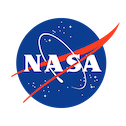


The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2024. California Institute of Technology. Government sponsorship acknowledged.